In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def g_of_x(X: np.ndarray, prob: float):
    X_mean = X.mean(axis=0)
    X_cov = cov(X)
    X_cov_inv = np.linalg.inv(X_cov)
    X_cov_det = np.linalg.det(X_cov)
    
    A = -0.5 * X_cov_inv
    B = X_cov_inv.dot(X_mean)
    C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) - 0.5 * np.log(X_cov_det) + np.log(prob)
    return lambda x: x.T.dot(A).dot(x) + B.T.dot(x) + C

In [12]:
def cov(X: np.ndarray):
    X = X - X.mean(axis=0)
    return np.dot(X.T, X) / (X.shape[0]-1)

In [17]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-20, 20, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = g1(np.array([X[i, j], Y[i, j]])) - g2(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=[0])

In [14]:
w1 = np.array([
    [1, -1],
    [2, -5],
    [3, -6],
    [4, -10],
    [5, -12],
    [6, -15]
])
w2 = np.array([
    [-1, 1],
    [-2, 5],
    [-3, 6],
    [-4, 10],
    [-5, 12],
    [-6, 15]
])
print(f"w1: {w1}")
print(f"w2: {w2}")

w1: [[  1  -1]
 [  2  -5]
 [  3  -6]
 [  4 -10]
 [  5 -12]
 [  6 -15]]
w2: [[-1  1]
 [-2  5]
 [-3  6]
 [-4 10]
 [-5 12]
 [-6 15]]


In [15]:
g1 = g_of_x(w1, 0.3)
g2 = g_of_x(w2, 0.7)

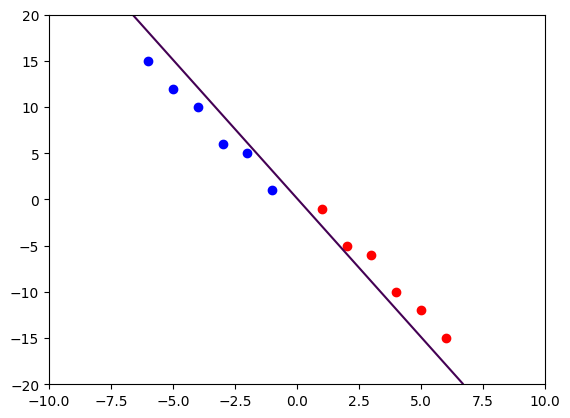

In [18]:
discriminant_plot(g1, g2)
plt.scatter(w1[:, 0], w1[:, 1], c='r')
plt.scatter(w2[:, 0], w2[:, 1], c='b')
plt.show()